In [0]:
!wget -c https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
!chmod +x Anaconda3-5.1.0-Linux-x86_64.sh
!bash ./Anaconda3-5.1.0-Linux-x86_64.sh -b -f -p /usr/local

--2019-04-25 21:45:55--  https://repo.continuum.io/archive/Anaconda3-5.1.0-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 577996269 (551M) [application/x-sh]
Saving to: ‘Anaconda3-5.1.0-Linux-x86_64.sh’

Anaconda3-5.1.0-Lin 100%[===================>] 551.22M   142MB/s    in 3.8s    

2019-04-25 21:45:59 (145 MB/s) - ‘Anaconda3-5.1.0-Linux-x86_64.sh’ saved [577996269/577996269]

PREFIX=/usr/local
installing: python-3.6.4-hc3d631a_1 ...
Python 3.6.4 :: Anaconda, Inc.
installing: ca-certificates-2017.08.26-h1d4fec5_0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: intel-openmp-2018.0.0-hc7b2577_8 ...
installing: libgcc-ng-7.2.0-h7cc24e2_2 ...
installing: libgfortran-ng-7.2.0-h9f7466a_2 ...
installing: libstdcxx-ng-7.2.0-h7a57d05_2 ...
installing: bzip2-1.0.6-h9a117a

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
! pip install networkx

In [0]:
! conda install -c conda-forge rdkit

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ 
CondaError: KeyboardInterrupt



In [0]:
datadir = "/content/gdrive/My Drive/520project/NCI_balanced/1-balance.sdf"
datadir2 = "/content/gdrive/My Drive/520project/NCI_balanced/41-balance.sdf"

In [0]:
import sys
sys.path.append('/usr/local/lib/python3.6/site-packages/')

In [0]:
from rdkit import Chem
import random
import math


def gen_split(datapath, trainrate=0.8, devrate=0.9):
    suppls = Chem.SDMolSupplier(datapath, removeHs = False, sanitize = False)
    suppl = [x for x in suppls]
    nummols = len(suppl)
    numtrain = int(math.floor(trainrate * nummols))
    numdev = int(math.floor(devrate*nummols))
    idxs = list(range(0,nummols))
    random.shuffle(idxs)
    trainadj = []
    trainnames = []
    trainlabels = []
    #trainsmiles = []
    devadj = []
    devnames = []
    devlabels = []
    #devsmiles = []
    testadj = []
    testnames = []
    testlabels = []
    #testsmiles = []
    for i in range(0,numtrain):
        idx = idxs[i]
        if suppl[idx]==None:
          print("No molecule at", idx)
        else:
          trainadj.append(Chem.rdmolops.GetAdjacencyMatrix(suppl[idx], True))
          trainnames.append([ato.GetAtomicNum() for ato in suppl[idx].GetAtoms()])
          trainlabels.append(int(float(suppl[idx].GetProp("value"))))
          #trainsmiles.append(Chem.MolToSmiles(suppl[idx]))
    for i in range(numtrain,numdev):
        idx = idxs[i]
        devadj.append(Chem.rdmolops.GetAdjacencyMatrix(suppl[idx], True))
        devnames.append([ato.GetAtomicNum() for ato in suppl[idx].GetAtoms()])
        devlabels.append(int(float(suppl[idx].GetProp("value"))))
        #devsmiles.append(Chem.MolToSmiles(suppl[idx]))
    for i in range(numdev,nummols):
        idx = idxs[i]
        testadj.append(Chem.rdmolops.GetAdjacencyMatrix(suppl[idx], True))
        testnames.append([ato.GetAtomicNum() for ato in suppl[idx].GetAtoms()])
        testlabels.append(int(float(suppl[idx].GetProp("value"))))
        #testsmiles.append(Chem.MolToSmiles(suppl[idx]))

    return trainadj, trainnames, trainlabels, devadj, devnames, devlabels, testadj,\
           testnames,  testlabels


def nameArray2Dic(names):
    """
    input
        names: 1d array containing atom names of 1 molecule
    return
        namedic: dictionary in the form of "node index":"atom name"
    """
    namedic = {}
    for idx in range(0,len(names)):
        namedic[idx] = names[idx]

    return namedic

In [0]:
suppls = Chem.SDMolSupplier(datadir,removeHs = False, sanitize = False)
suppl = [x for x in suppls]

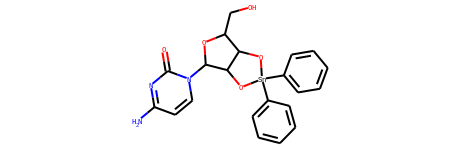

In [0]:
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import AllChem
m = suppl[10]
template = suppl[10]
AllChem.Compute2DCoords(template)
AllChem.GenerateDepictionMatching2DStructure(m,template)
m


In [0]:
len(suppl)

37518

In [0]:
trainadj, trainnames, trainlabels, devadj, devnames, devlabels, testadj,\
           testnames, testlabels = gen_split(datadir,0.9,1.0)


In [0]:
trainadj2, trainnames2, trainlabels2, devadj2, devnames2, devlabels2, testadj2,\
           testnames2, testlabels2 = gen_split(datadir2,0.1,0.2)

In [0]:
diccc = nameArray2Dic(trainnames[1])
print(diccc)
print(trainlabels)

In [0]:
import networkx as nx
import numpy as np
import pandas as pd
from scipy import sparse

In [0]:
g0=nx.from_numpy_matrix(np.array(trainadj[0]))
print(nx.normalized_laplacian_matrix(g0))

In [0]:
def padded_spectral(moladj, embedding_dimension=30, normalized=True):
    
    # Padding with zeros
    embedding = np.zeros(embedding_dimension)
    
    # Usage of networkx graph objects
    graph = nx.from_numpy_matrix(np.array(moladj))
    adj_matrix = nx.adj_matrix(graph)
    n_nodes, m_nodes = adj_matrix.shape
    k = min(embedding_dimension + 1, n_nodes - 1)

    if normalized:
        laplacian = nx.normalized_laplacian_matrix(graph)
    else:
        laplacian = nx.laplacian_matrix(graph)

    # Minus the eigen decomposition of minus the Laplacian is more stable than directly
    # computing the eigen decomposition of the Laplacian
    
    v0 = np.random.uniform(-1, 1, laplacian.shape[0])
    eigenvalues = sparse.linalg.eigsh(-laplacian, k=k, sigma=1.0, which='LM', tol=1e-6, v0=v0, return_eigenvectors=False)
    embedding[:len(eigenvalues)-1] = sorted(-eigenvalues)[1:]
    
    return embedding
  
  
def gen_emb(listadj):
    listemb = []
    for i in range(len(listadj)):
        listemb.append(padded_spectral(listadj[i]))
    return listemb

In [0]:
trainemb = gen_emb(trainadj)
devemb = gen_emb(devadj)
testemb = gen_emb(testadj)

In [0]:
trainemb2 = gen_emb(trainadj2)
devemb2 = gen_emb(devadj2)
testemb2 = gen_emb(testadj2)

In [0]:
print(padded_spectral(trainadj[0]))

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from collections import defaultdict
from collections import Counter


def get_precision(y_pred, y_true):
    ## YOUR CODE HERE...
    counts = Counter(zip(y_pred, y_true))
    TP = counts[1, 1]
    FP = counts[1, -1]
    if (TP + FP > 0):
        precision = TP / float(TP + FP)
    else:
        precision = 0
    return precision


## Calculates the recall of the predicted labels
def get_recall(y_pred, y_true):
    ## YOUR CODE HERE...
    counts = Counter(zip(y_pred, y_true))
    #print(counts)
    TP = counts[1, 1]
    FN = counts[-1, 1]
    if (TP + FN > 0):
        recall = TP / float(TP + FN)
    else:
        recall = 0
    return recall


## Calculates the f-score of the predicted labels
def get_fscore(y_pred, y_true):
    ## YOUR CODE HERE...
    precision = get_precision(y_pred, y_true)
    recall = get_recall(y_pred, y_true)
    if (precision + recall > 0):
        fscore = 2 * precision * recall / (precision + recall)
    else:
        fscore = 0
    return fscore

def get_acc(y_pred, y_true):
    counts = Counter(zip(y_pred, y_true))
    #print(counts)
    TP = counts[1, 1]
    FN = counts[-1, 1]
    TN = counts[-1, -1]
    FP = counts[1, -1]
    acc = (TP+TN)/(TP+TN+FP+FN)
    return acc

def test_predictions(y_pred, y_true):
    precision = get_precision(y_pred, y_true)
    recall = get_recall(y_pred, y_true)
    fscore = get_fscore(y_pred, y_true)
    acc = get_acc(y_pred, y_true)
    print("Accuracy: {},Precision: {}, recall: {}, F score: {}".format(acc, precision, recall, fscore))

    return

def eval(model, trainemb, trainlabel, valemb, vallabel,trainemb2, trainlabel2, valemb2, vallabel2):
    model.fit(trainemb, trainlabel)
    trainpred = model.predict(trainemb)
    pred = model.predict(valemb)
    #print(pred)
    #print(np.array(vallabel))
    test_predictions(trainpred,np.array(trainlabel))
    test_predictions(pred,np.array(vallabel))
    #model.partial_fit(trainemb2, trainlabel2)
    #trainpred2 = model.predict(trainemb2)
    #pred2 = model.predict(valemb2)
    #test_predictions(pred2,np.array(vallabel2))
    
    return
def eval_small(model,trainemb2, trainlabel2, valemb2, vallabel2):
   
    model.fit(trainemb2, trainlabel2)
    trainpred2 = model.predict(trainemb2)
    pred2 = model.predict(valemb2)
    test_predictions(pred2,np.array(vallabel2))
    
    return
    

In [0]:
svmclf = SVC(class_weight= 'balanced')
logclf = LogisticRegression(class_weight= 'balanced')
adaclf = AdaBoostClassifier()
rf_parameters = {'n_estimators': 500, 'max_depth': 100}
rdmclf = RandomForestClassifier(**rf_parameters, random_state=1, class_weight='balanced')

print("SVM:")
eval(svmclf, trainemb, trainlabels, devemb, devlabels,trainemb2, trainlabels2, devemb2, devlabels2)
print("Log regression:")
eval(logclf, trainemb, trainlabels, devemb, devlabels,trainemb2, trainlabels2, devemb2, devlabels2)
print("Adaboost:")
eval(adaclf, trainemb, trainlabels, devemb, devlabels,trainemb2, trainlabels2, devemb2, devlabels2)
print("Random forest:")
eval(rdmclf, trainemb, trainlabels, devemb, devlabels,trainemb2, trainlabels2, devemb2, devlabels2)
"""
svmclf = SVC()
logclf = LogisticRegression()
adaclf = AdaBoostClassifier()
rf_parameters = {'n_estimators': 500, 'max_depth': 100}
rdmclf = RandomForestClassifier(**rf_parameters, random_state=1, class_weight='balanced')

print("SVM:")
eval_small(svmclf,trainemb2, trainlabels2, devemb2, devlabels2)
print("Log regression:")
eval_small(logclf,trainemb2, trainlabels2, devemb2, devlabels2)
print("Adaboost:")
eval_small(adaclf,trainemb2, trainlabels2, devemb2, devlabels2)
print("Random forest:")
eval_small(rdmclf,trainemb2, trainlabels2, devemb2, devlabels2)
"""

SVM:


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.617911372792067,Precision: 0.6394407652685798, recall: 0.5390818858560794, F score: 0.5849882194547291
Accuracy: 0.6155988857938719,Precision: 0.6641221374045801, recall: 0.48066298342541436, F score: 0.5576923076923076
Log regression:
Accuracy: 0.6365044933374652,Precision: 0.6504455106237149, recall: 0.5887096774193549, F score: 0.6180397264734614
Accuracy: 0.6072423398328691,Precision: 0.6298701298701299, recall: 0.5359116022099447, F score: 0.5791044776119402
Adaboost:


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.7056089246978617,Precision: 0.7367668097281831, recall: 0.6389578163771712, F score: 0.6843853820598007
Accuracy: 0.6573816155988857,Precision: 0.6959459459459459, recall: 0.569060773480663, F score: 0.6261398176291793
Random forest:
Accuracy: 0.9965912612333436,Precision: 0.9962802231866088, recall: 0.9968982630272953, F score: 0.9965891472868218
Accuracy: 0.7465181058495822,Precision: 0.7960526315789473, recall: 0.6685082872928176, F score: 0.7267267267267267


'\nsvmclf = SVC()\nlogclf = LogisticRegression()\nadaclf = AdaBoostClassifier()\nrf_parameters = {\'n_estimators\': 500, \'max_depth\': 100}\nrdmclf = RandomForestClassifier(**rf_parameters, random_state=1, class_weight=\'balanced\')\n\nprint("SVM:")\neval_small(svmclf,trainemb2, trainlabels2, devemb2, devlabels2)\nprint("Log regression:")\neval_small(logclf,trainemb2, trainlabels2, devemb2, devlabels2)\nprint("Adaboost:")\neval_small(adaclf,trainemb2, trainlabels2, devemb2, devlabels2)\nprint("Random forest:")\neval_small(rdmclf,trainemb2, trainlabels2, devemb2, devlabels2)\n'

In [0]:
"""
SVM implementation
"""

import numpy as np
import numpy.matlib
#
from grakel import Graph, RandomWalk, ShortestPath, WeisfeilerLehman, SubgraphMatching, Propagation,HadamardCode, VertexHistogram
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC



DATA_ROOT = "/content/gdrive/My Drive/520project/NCI_balanced/1-balance.sdf"
NUM_TRAIN_INSTANCES = 100
NUM_TEST_INSTANCES = 50
KERNELS = [RandomWalk, ShortestPath]


def main():
    train_adj, train_names, train_labels, devadj, devnames, devlabels, test_adj, test_names, test_labels = gen_split(
        DATA_ROOT)

    num_train_samples = len(train_names)
    num_test_samples = len(test_names)

    print("Number of training instances: %d" % num_train_samples)
    print("Number of test instances: %d" % num_test_samples)

    training_data = [train_adj, train_names, train_labels]
    [train_adj, train_names, train_labels] = [ls[:NUM_TRAIN_INSTANCES]
                                              for ls in training_data]

    test_data = [test_adj, test_names, test_labels]
    [test_adj, test_names, test_labels] = [ls[:NUM_TEST_INSTANCES]
                                           for ls in test_data]

    train_graphs = create_graphs(
        train_adj, train_names)
    test_graphs = create_graphs(
        test_adj, test_names)

    results = {}
    for graph_kernel in KERNELS:
        if graph_kernel == HadamardCode:
          gk = graph_kernel(base_kernel=RandomWalk)
        else:
          gk = graph_kernel()
        kernel_name = type(gk).__name__
        print("Kernel is %s" % kernel_name)

        acc = train_SVM(gk, train_graphs, test_graphs,
                        train_labels, test_labels, kernel=graph_kernel)
        results[kernel_name] = acc

        print("-" * 50 + '\n')

    print(results)


def create_graphs(adj_mat, names):
    """Create list of Graph instances
    params:
        adj_mat: list of matrices       - adjacency matrices of graphs
        names: list of lists of ints    - names of each node (molecule) in graph
    returns:
        list of Graph instances
    """

    num_samples = len(names)
    return [Graph(adj_mat[i], names[i], graph_format="adjacency") for i in range(num_samples)]


def train_SVM(gk, train_graphs, test_graphs, train_labels, test_labels, kernel=RandomWalk):
    """Train SVM model for given kernel on NCI data
    params:
        gk: grakel.Kernel instance              - SVM graph kernel
        train_graphs: list of Graph instances   - training data
        test_graphs: list of Graph instances    - test data
        train_labels: list of ints              - training labels
        kernel: grakel.Kernel function          - kernel for SVM
    returns:
        accuracy of kernel SVM
    """

    print("Computing training kernel")
    K_train = gk.fit_transform(train_graphs)

    print("Computing test kernel")
    K_test = gk.transform(test_graphs)

    print("Classifying molecules")
    clf = SVC(kernel='precomputed')

    # Fit on the train Kernel
    clf.fit(K_train, train_labels)

    # Predict and test
    y_pred = clf.predict(K_test)
    
    test_predictions(test_labels, y_pred)

    return accuracy_score(test_labels, y_pred)



In [0]:
main()

Number of training instances: 2868
Number of test instances: 359
Kernel is RandomWalk
Computing training kernel
Computing test kernel
Classifying molecules
Accuracy: 0.56,Precision: 0.4444444444444444, recall: 0.4, F score: 0.4210526315789474
--------------------------------------------------

Kernel is ShortestPath
Computing training kernel
Computing test kernel
Classifying molecules
Accuracy: 0.6,Precision: 0.6111111111111112, recall: 0.4583333333333333, F score: 0.5238095238095238
--------------------------------------------------

{'RandomWalk': 0.56, 'ShortestPath': 0.6}


In [0]:
!pip install grakel-dev

    100% |████████████████████████████████| 1.5MB 785kB/s 
    100% |████████████████████████████████| 829kB 1.3MB/s 
    100% |████████████████████████████████| 24.8MB 47kB/s 
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /root/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built future
  Found existing installation: scipy 1.0.0
    Uninstalling scipy-1.0.0:
      Successfully uninstalled scipy-1.0.0
